In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

In [3]:
ds_ci = xr.open_dataset('../data/ai_ready/CloudImageryDataset.nc')
ds_co = xr.open_dataset('../data/ai_ready/CloudOpticalDepthDataset.nc')
ds_sw = xr.open_dataset('../data/ai_ready/ReflectedSWDataset.nc')

In [4]:
CID = ds_ci['CloudImagery']
COD = ds_co['CloudOpticalDepth']
RSW = ds_sw['ReflectedSW']

In [5]:
COD_interp


NameError: name 'COD_interp' is not defined

In [7]:
CID_interp = CID.interp(longitude=RSW.lon[0].data[::-1], latitude=RSW.lat[0].data[::-1], method="nearest")
COD_interp = COD.interp(longitude=RSW.lon[0].data[::-1], latitude=RSW.lat[0].data[::-1], method="nearest")


## 2D plots of ReflectedSW, Cloud Image, and Cloud Optical Depth

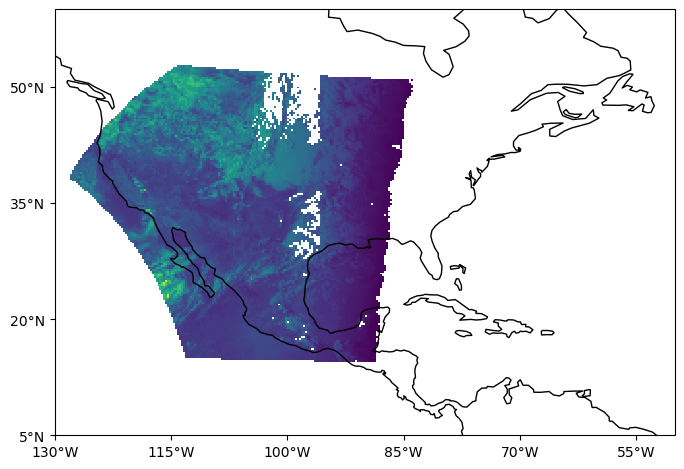

In [8]:
fig = plt.figure(figsize=(8, 10))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
plt.pcolormesh(ds_sw.lon[0,...],ds_sw.lat[0,...], ds_sw['ReflectedSW'][2,...],transform=ccrs.PlateCarree())
axs.coastlines()
axs.set_extent([-130, -50, 5, 60], ccrs.PlateCarree())
# Define the xticks for longitude
axs.set_xticks(np.arange(-130,-50,15), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
axs.set_yticks(np.arange(5,60,15), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)

plt.show()



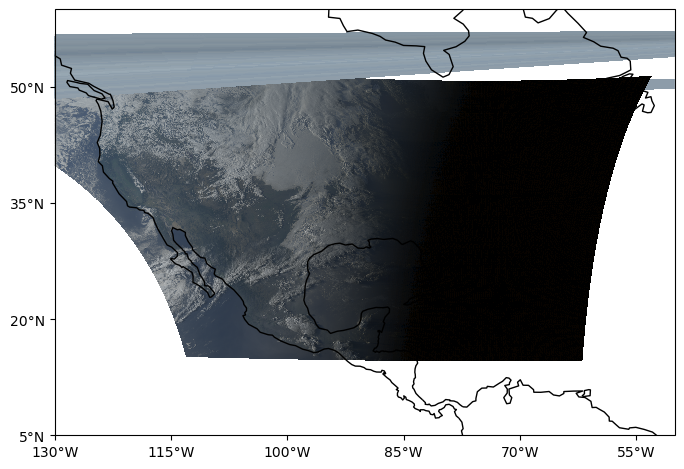

In [9]:
fig = plt.figure(figsize=(8, 10))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# plt.pcolormesh(ds_sw.lon[0,...],ds_sw.lat[0,...], ds_sw['ReflectedSW'][0,...],transform=ccrs.PlateCarree())
plt.pcolormesh(ds_ci.lon[0,...],ds_ci.lat[0,...], ds_ci['CloudImagery'][2,...],transform=ccrs.PlateCarree())
axs.coastlines()
axs.set_extent([-130, -50, 5, 60], ccrs.PlateCarree())
# Define the xticks for longitude
axs.set_xticks(np.arange(-130,-50,15), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
axs.set_yticks(np.arange(5,60,15), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)

plt.show()



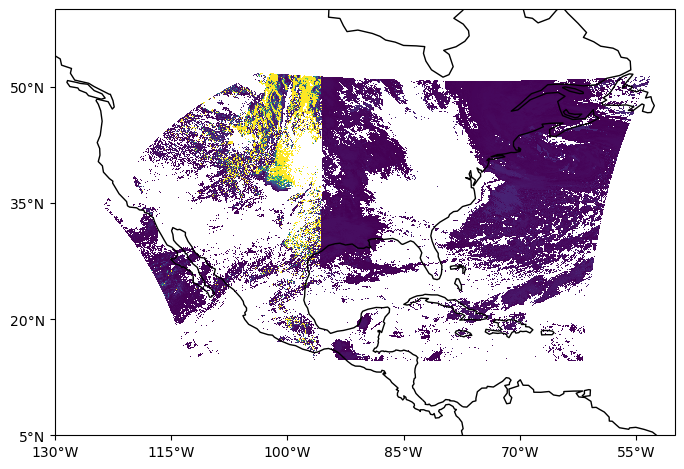

In [10]:
fig = plt.figure(figsize=(8, 10))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
plt.pcolormesh(ds_co.lon[0,...],ds_co.lat[0,...], ds_co['CloudOpticalDepth'][2,...],transform=ccrs.PlateCarree())
axs.coastlines()
axs.set_extent([-130, -50, 5, 60], ccrs.PlateCarree())
# Define the xticks for longitude
axs.set_xticks(np.arange(-130,-50,15), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
axs.set_yticks(np.arange(5,60,15), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)

plt.show()



## Statistical Analysis

Text(0, 0.5, 'Frequency')

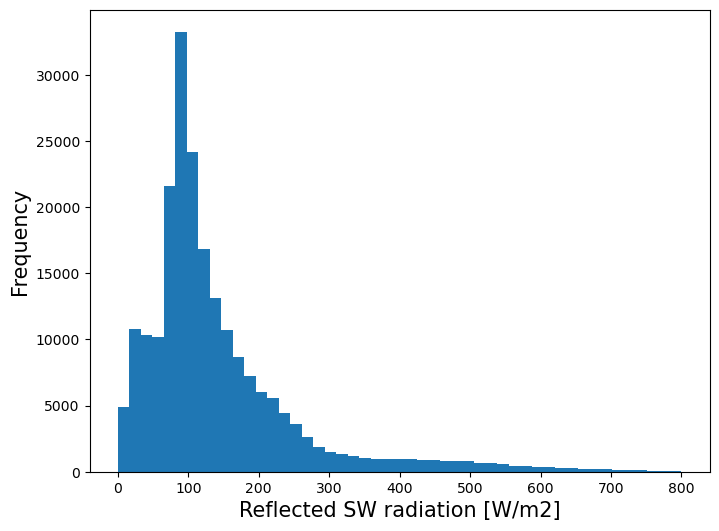

In [17]:
fig,axs=plt.subplots(1,1,figsize=(8,6))
_=axs.hist(RSW.data[~np.isnan(RSW.data)],bins=np.linspace(0,800,50))
axs.set_xlabel('Reflected SW radiation [W/m2]',fontsize=15)
axs.set_ylabel('Frequency',fontsize=15)

Text(0, 0.5, 'Frequency')

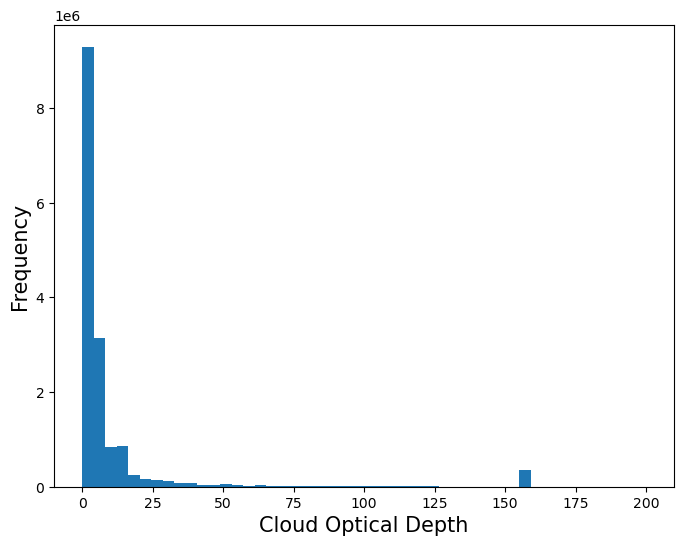

In [21]:
fig,axs=plt.subplots(1,1,figsize=(8,6))
_=axs.hist(COD.data[~np.isnan(COD.data)],bins=np.linspace(0,200,50))
axs.set_xlabel('Cloud Optical Depth',fontsize=15)
axs.set_ylabel('Frequency',fontsize=15)